# What are the squirrels in NYC up to?

In [1]:
import pandas as pd
import numpy as np
import datetime
import json

In [144]:
squirrel_df = pd.read_csv("Squirrel_Census.csv")
len(squirrel_df)

3023

### Understanding the dataset

In [18]:
squirrel_df.columns

Index(['X', 'Y', 'Unique Squirrel ID', 'Hectare', 'Shift', 'Date',
       'Hectare Squirrel Number', 'Age', 'Primary Fur Color',
       'Highlight Fur Color', 'Combination of Primary and Highlight Color',
       'Color notes', 'Location', 'Above Ground Sighter Measurement',
       'Specific Location', 'Running', 'Chasing', 'Climbing', 'Eating',
       'Foraging', 'Other Activities', 'Kuks', 'Quaas', 'Moans', 'Tail flags',
       'Tail twitches', 'Approaches', 'Indifferent', 'Runs from',
       'Other Interactions', 'Lat/Long'],
      dtype='object')

In [63]:
squirrel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3023 entries, 0 to 3022
Data columns (total 31 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   X                                           3023 non-null   float64
 1   Y                                           3023 non-null   float64
 2   Unique Squirrel ID                          3023 non-null   object 
 3   Hectare                                     3023 non-null   object 
 4   Shift                                       3023 non-null   object 
 5   Date                                        3023 non-null   int64  
 6   Hectare Squirrel Number                     3023 non-null   int64  
 7   Age                                         2902 non-null   object 
 8   Primary Fur Color                           2968 non-null   object 
 9   Highlight Fur Color                         1937 non-null   object 
 10  Combination 

In [106]:
squirrel_df["Hectare"].unique()

array(['37F', '21B', '11B', '32E', '13E', '11H', '36H', '33F', '21C',
       '11D', '20B', '22F', '36I', '05C', '07H', '16C', '14E', '32A',
       '17F', '16I', '12I', '32F', '25A', '15E', '39G', '29I', '07E',
       '17C', '10A', '28A', '12B', '18A', '33H', '29C', '38C', '31H',
       '08H', '34F', '13H', '35C', '17E', '02B', '19D', '40B', '03E',
       '39C', '06G', '14F', '06I', '15F', '08B', '03A', '05E', '05F',
       '16E', '13F', '29H', '23C', '33C', '38G', '16G', '35A', '28C',
       '32D', '22A', '19C', '15G', '10F', '42E', '22B', '05A', '32H',
       '42C', '41D', '21G', '07F', '38F', '41B', '36A', '31A', '42G',
       '37D', '37E', '24B', '07G', '15I', '19B', '13D', '35B', '40D',
       '38B', '40I', '07B', '40A', '03B', '21D', '10B', '41A', '02F',
       '26A', '35E', '11G', '07A', '03D', '35D', '18G', '06F', '09F',
       '38E', '33G', '32G', '04D', '06H', '15D', '39H', '20F', '09G',
       '05D', '23F', '39A', '13A', '10G', '13C', '32C', '31D', '18C',
       '40E', '04G',

In [107]:
squirrel_df["Primary Fur Color"].unique()
# squirrel_df["Highlight Fur Color"].unique()
# squirrel_df["Color notes"].unique()

array([nan, 'Gray', 'Cinnamon', 'Black'], dtype=object)

In [109]:
# in Java
for i in range(150):
    field = squirrel_df.iloc[i]["Other Activities"]
    if field == field:
        print(field)

grooming
walking
moving slowly
sitting
eating (ate upside down on a tree — #jealous)
wrestling with mother
running (with nut)
playing with #5
hiding nut
drank from a pond of rain water
sitting
chasing (#4 across trees)
gathering acorns
eating (a mushroom),circles around us,really fat,scratching himself,grooming activity
digging
walking
sitting
walking on branch
being chased,was pushed by other squirrel
climbing (tree)
chasing #8
still
stop to look at me—then ran
chasing (a chipmunk)
took nut to bury
flying
stole (found?) an entire sandwich
walking w/ something in mouth
burying nut
begging
was hanging out w/ #2 until i showed up
quietly
nest building
burying
dead (something ran over it)
chased #12


In [ ]:
i=0
i+=20
# squirrel_df[~squirrel_df["Other Activities"].isna()]["Other Activities"].iloc[i:i+20]
squirrel_df[~squirrel_df["Other Interactions"].isna()]["Other Interactions"].iloc[i:i+20]

### Data Cleaning

In [110]:
# dates. 
squirrel_df["Date"]

0       10142018
1       10192018
2       10142018
3       10172018
4       10172018
          ...   
3018    10072018
3019    10132018
3020    10122018
3021    10102018
3022    10122018
Name: Date, Length: 3023, dtype: int64

In [118]:
def easy_convert_date(orig):
    orig = str(orig)
    month = int(orig[0:2])
    day = int(orig[2:4])
    year = 2018
    return datetime.date(year, month, day).strftime("%m/%d/%Y")

squirrel_df["date_string"] = squirrel_df.Date.apply(easy_convert_date)

In [121]:
# squirrel_df["date_month"] = squirrel_df["Date"].apply(lambda x: int(str(x)[0:2]))
# squirrel_df["date_day"] = squirrel_df["Date"].apply(lambda x: int(str(x)[2:4]))
# squirrel_df["date_year"] = 2018

In [127]:
print(squirrel_df.date_day.min())
print(squirrel_df.date_day.max())

6
20


In [134]:
squirrel_df.date_string.sort_values().unique()

array(['10/06/2018', '10/07/2018', '10/08/2018', '10/10/2018',
       '10/12/2018', '10/13/2018', '10/14/2018', '10/17/2018',
       '10/18/2018', '10/19/2018', '10/20/2018'], dtype=object)

In [145]:
# text cleaning
squirrel_df["Other Activities"].sample(10)

1260      chasing #5
1811             NaN
2816             NaN
1302    chasing (#3)
454              NaN
1773             NaN
2249             NaN
692              NaN
1954             NaN
533              NaN
Name: Other Activities, dtype: object

In [166]:
from cleantext.sklearn import CleanTransformer

cleaner = CleanTransformer(no_punct=True,
                           lower=True, 
                           no_emoji=True, 
                           no_line_breaks=True, 
                           no_urls=True, 
                           normalize_whitespace=True,
                           to_ascii=False)

In [197]:
text_columns = ["Other Activities", "Other Interactions"]
for col in text_columns:
    new_col = f"{col}_clean"
    squirrel_df[new_col] = cleaner.transform(squirrel_df[col].str.replace("-", " ").fillna(""))

In [219]:
# 1332
squirrel_df["Other Activities_clean"].sample(10)

2204           
26             
469            
2466           
683            
502     peanuts
2557           
291            
381            
1998           
Name: Other Activities_clean, dtype: object

### EDA

In [ ]:
# How many squirrels per hectacre? 
# What activities are they engaging in?
# What activities do they do together?

In [ ]:
# squirrel_df.groupby("Hectare").count()
# squirrel_df.groupby("Hectare").count().sort_values(by="Hectare Squirrel Number", ascending=False).X.plot(kind="hist")

In [230]:
activities = squirrel_df.columns[15:20]
sounds = squirrel_df.columns[21:24]
tails = squirrel_df.columns[24:26]
interactions = squirrel_df.columns[26:29]

In [232]:
print(activities)
print(sounds)
print(tails)
print(interactions)

Index(['Running', 'Chasing', 'Climbing', 'Eating', 'Foraging'], dtype='object')
Index(['Kuks', 'Quaas', 'Moans'], dtype='object')
Index(['Tail flags', 'Tail twitches'], dtype='object')
Index(['Approaches', 'Indifferent', 'Runs from'], dtype='object')


In [245]:
activity_counts = [len(squirrel_df[squirrel_df[col]]) for col in activities]
df = pd.DataFrame({"activity": activities, "counts": activity_counts})
df

,activity,counts
0,Running,730
1,Chasing,279
2,Climbing,658
3,Eating,760
4,Foraging,1435


Text(0, 0.5, 'Number of Squirrels')

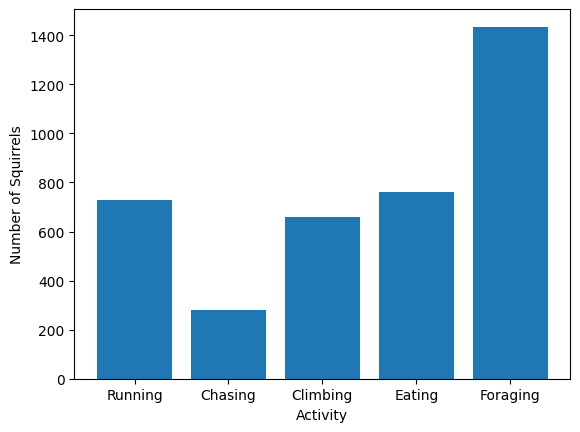

In [257]:
import matplotlib.pyplot as plt
plt.bar(x = df.activity, height = df.counts)
plt.xlabel("Activity")
plt.ylabel("Number of Squirrels")
plt.title("Number of Squirrels")

Text(0.5, 1.0, 'Number of Squirrels doing each sound')

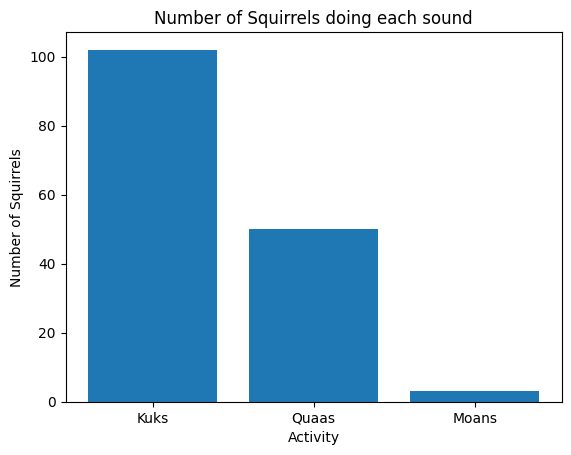

In [262]:
counts = [len(squirrel_df[squirrel_df[col]]) for col in sounds]
df = pd.DataFrame({"action": sounds, "counts": counts})
plt.bar(x = df.action, height = df.counts)
plt.xlabel("Activity")
plt.ylabel("Number of Squirrels")
plt.title("Number of Squirrels doing each sound")

Text(0.5, 1.0, 'Number of Squirrels doing each tail motion')

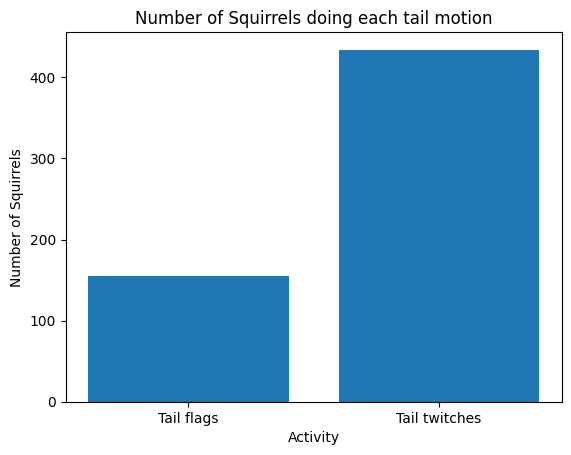

In [263]:
counts = [len(squirrel_df[squirrel_df[col]]) for col in tails]
df = pd.DataFrame({"action": tails, "counts": counts})
plt.bar(x = df.action, height = df.counts)
plt.xlabel("Activity")
plt.ylabel("Number of Squirrels")
plt.title("Number of Squirrels doing each tail motion")

Text(0.5, 1.0, 'Number of Squirrels doing each interaction')

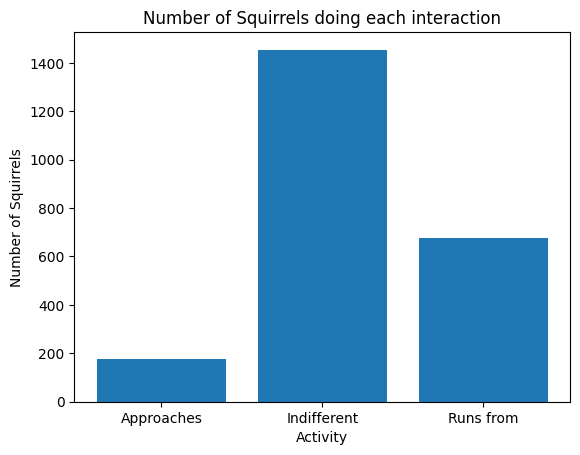

In [264]:
counts = [len(squirrel_df[squirrel_df[col]]) for col in interactions]
df = pd.DataFrame({"action": interactions, "counts": counts})
plt.bar(x = df.action, height = df.counts)
plt.xlabel("Activity")
plt.ylabel("Number of Squirrels")
plt.title("Number of Squirrels doing each interaction")

In [274]:
# are there any activities frequently done together?
all_cols = np.concatenate([activities, sounds, tails, interactions])

In [303]:
overlap_lists = []
for i, col in enumerate(all_cols):
    row_overlap = []
    col_i = all_cols[i]
    for j, col in enumerate(all_cols):
        col_j = all_cols[j]
        # val = len(squirrel_df[(squirrel_df[col_i] == True) & (squirrel_df[col_j] == True)])
        val = len(squirrel_df[(squirrel_df[col_i] == True) & (squirrel_df[col_j] == True)]) / len(squirrel_df[(squirrel_df[col_i] == True)])
        row_overlap.append(val)
    overlap_lists.append(row_overlap)

overlapdf = pd.DataFrame(overlap_lists, index=all_cols, columns=all_cols)
overlapdf

,Running,Chasing,Climbing,Eating,Foraging,Kuks,Quaas,Moans,Tail flags,Tail twitches,Approaches,Indifferent,Runs from
Running,1.000000,0.105479,0.176712,0.156164,0.279452,0.031507,0.013699,0.000000,0.058904,0.161644,0.052055,0.378082,0.347945
Chasing,0.275986,1.000000,0.168459,0.107527,0.193548,0.068100,0.053763,0.003584,0.082437,0.168459,0.028674,0.476703,0.143369
Climbing,0.196049,0.071429,1.000000,0.159574,0.193009,0.062310,0.021277,0.003040,0.047112,0.129179,0.041033,0.414894,0.262918
Eating,0.150000,0.039474,0.138158,1.000000,0.467105,0.025000,0.007895,0.000000,0.052632,0.172368,0.088158,0.540789,0.215789
Foraging,0.142160,0.037631,0.088502,0.247387,1.000000,0.018815,0.011847,0.000697,0.045993,0.165157,0.072474,0.550523,0.199303
Kuks,0.225490,0.186275,0.401961,0.186275,0.264706,1.000000,0.147059,0.000000,0.127451,0.137255,0.039216,0.323529,0.303922
Quaas,0.200000,0.300000,0.280000,0.120000,0.340000,0.300000,1.000000,0.020000,0.160000,0.140000,0.000000,0.340000,0.180000
Moans,0.000000,0.333333,0.666667,0.000000,0.333333,0.000000,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.666667
Tail flags,0.277419,0.148387,0.200000,0.258065,0.425806,0.083871,0.051613,0.000000,1.000000,0.129032,0.064516,0.535484,0.322581
Tail twitches,0.271889,0.108295,0.195853,0.301843,0.546083,0.032258,0.016129,0.000000,0.046083,1.000000,0.080645,0.476959,0.276498


<AxesSubplot: >

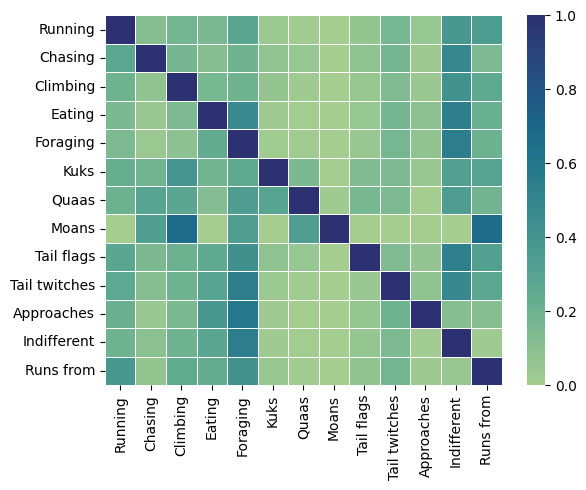

In [304]:
sns.heatmap(overlapdf, linewidth=.5, cmap="crest")
# sns.heatmap(overlapdf, annot=True,linewidth=.5, cmap="crest")

<AxesSubplot: >

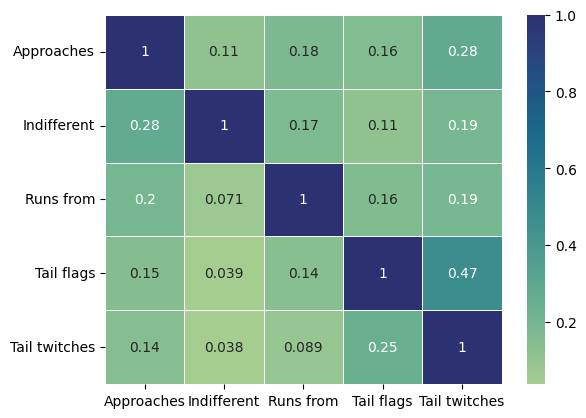

In [301]:
cols = np.concatenate([interactions, tails])
# cols = np.concatenate([activities, interactions])
overlap_lists = []
for i, col in enumerate(cols):
    row_overlap = []
    col_i = all_cols[i]
    for j, col in enumerate(cols):
        col_j = all_cols[j]
        # val = len(squirrel_df[(squirrel_df[col_i] == True) & (squirrel_df[col_j] == True)])
        val = len(squirrel_df[(squirrel_df[col_i] == True) & (squirrel_df[col_j] == True)]) / len(squirrel_df[(squirrel_df[col_i] == True)])
        row_overlap.append(val)
    overlap_lists.append(row_overlap)

overlapdf = pd.DataFrame(overlap_lists, index=cols, columns=cols)
sns.heatmap(overlapdf, annot=True,linewidth=.5, cmap="crest")

In [320]:
# how often to squirrels hang out with their friends?
# squirrel_df["Other Activities"].str.contains("\d").value_counts()
# squirrel_df[squirrel_df["Other Interactions"].str.contains("\d").fillna(False)]["Other Interactions"]
# squirrel_df[squirrel_df["Other Activities"].str.contains("\d").fillna(False)]["Other Activities"]
num_hangouts = len(squirrel_df[squirrel_df["Other Activities"].str.contains("\d").fillna(False)])
percent_hangouts = round((num_hangouts / len(squirrel_df[~squirrel_df["Other Activities"].isna()])), 2) *100
print(f"Squirrels hang out with other squirrels {percent_hangouts} % of the time")

Squirrels hang out with other squirrels 19.0 % of the time
